# 데이터 시각화 연습문제 (3) - seaborn 막대, 빈도 그래프

In [ ]:
# https://data.hossam.kr/D01/mpg.xlsx

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sb

In [30]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (15, 5)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False


In [31]:
## 데이터 불러오기 
df = pd.read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 문제 1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

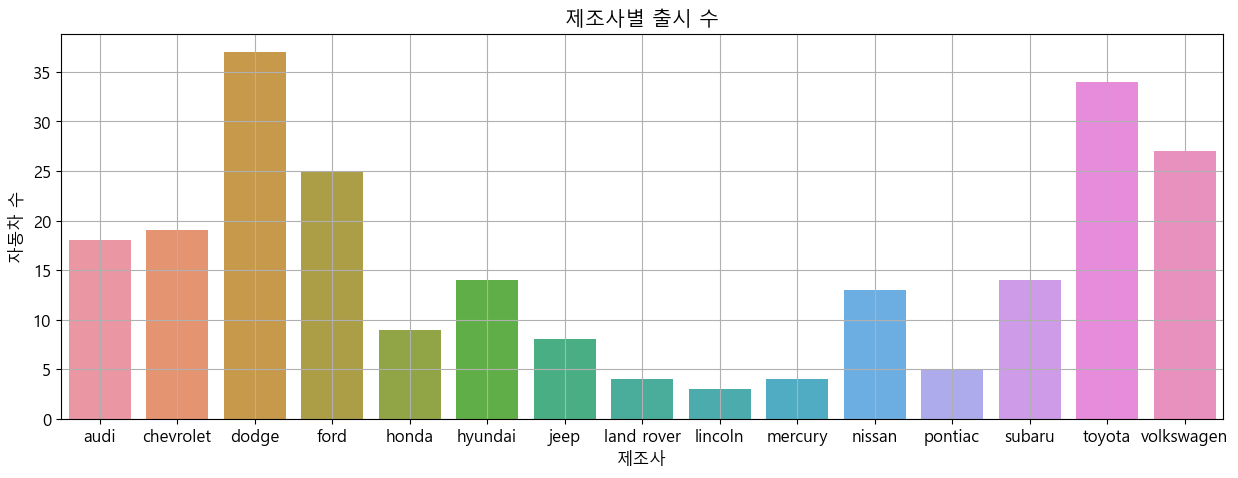

In [32]:
sb.countplot(df,x="manufacturer")
plt.title("제조사별 출시 수")
plt.xlabel("제조사")
plt.ylabel("자동차 수")
plt.grid()
plt.show()
plt.close()

# 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

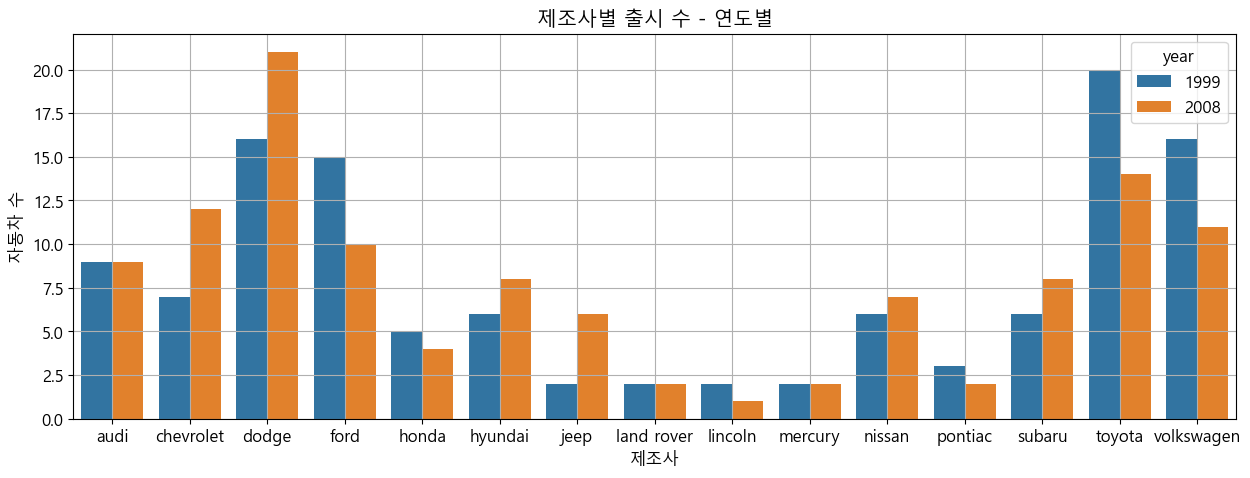

In [33]:
sb.countplot(df,x="manufacturer",hue="year")
plt.title("제조사별 출시 수 - 연도별")
plt.xlabel("제조사")
plt.ylabel("자동차 수")
plt.grid()
plt.show()
plt.close()

# 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

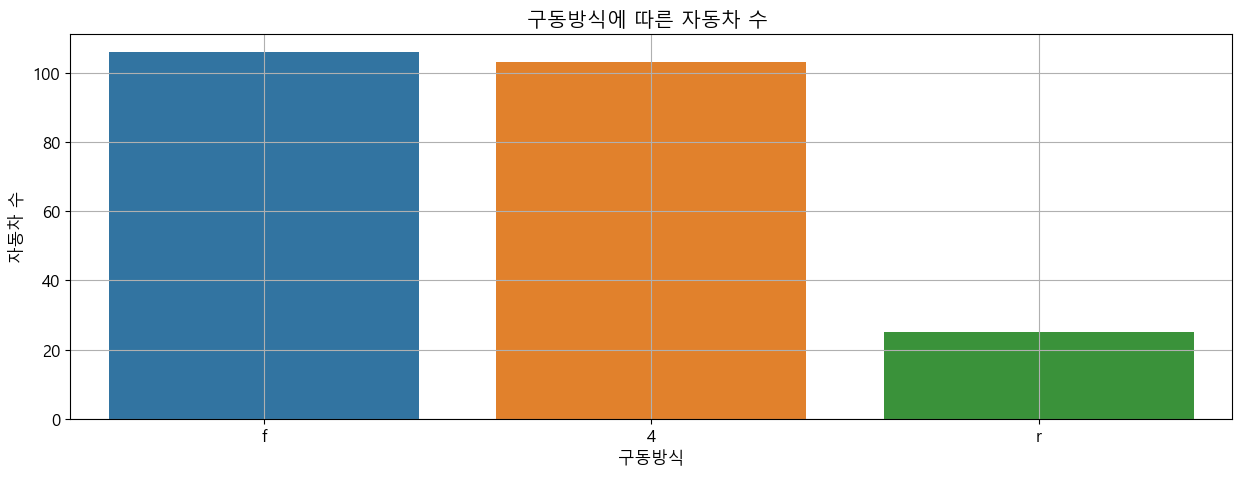

In [34]:
df['trans'].unique()
sb.countplot(df,x="drv")
plt.title("구동방식에 따른 자동차 수 ")
plt.xlabel("구동방식")
plt.ylabel("자동차 수")
plt.grid()
plt.show()
plt.close()

# 문제4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

In [35]:
df['cty'].unique()

array([18, 21, 20, 16, 19, 15, 17, 14, 11, 13, 12, 22,  9, 28, 24, 25, 23,
       26, 33, 35, 29], dtype=int64)

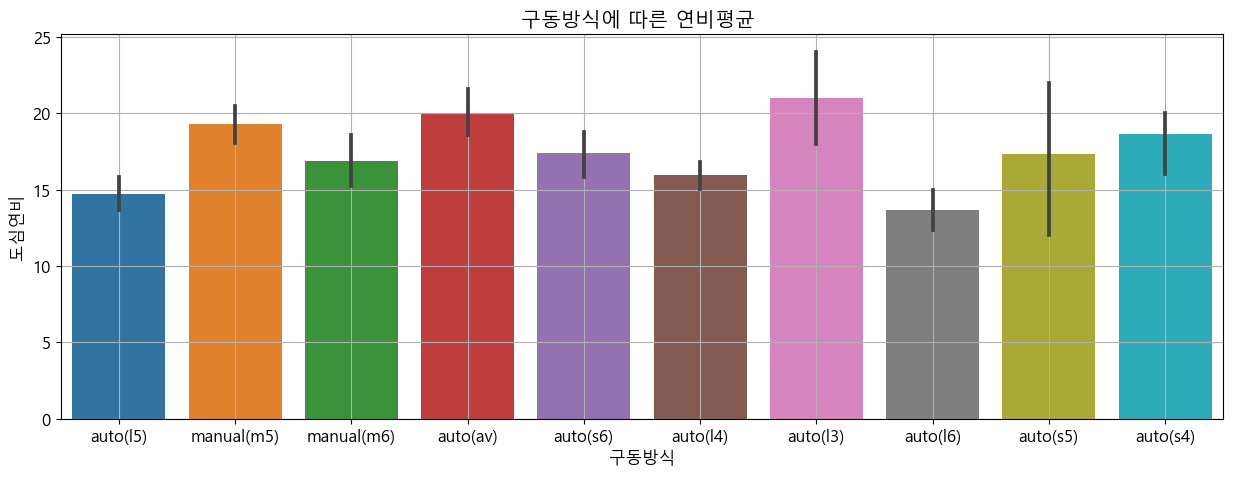

In [36]:
sb.barplot(df,x="trans",y='cty')
plt.title("구동방식에 따른 연비평균 ")
plt.xlabel("구동방식")
plt.ylabel("도심연비")
plt.grid()
plt.show()
plt.close()

# 문제5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

In [37]:
df['manufacturer'].unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

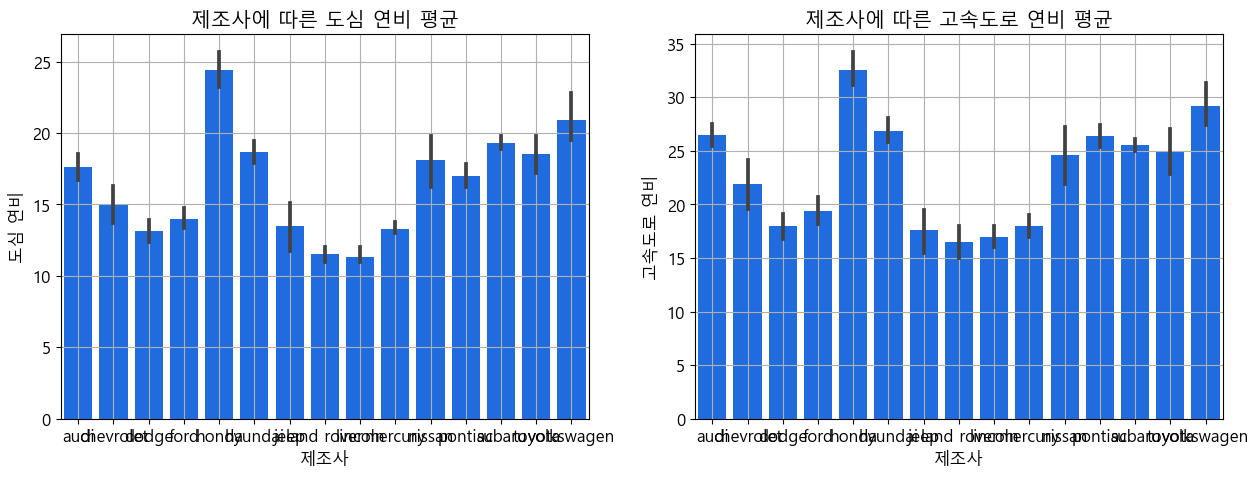

In [38]:

fig, ax = plt.subplots(1,2)

plt.subplots_adjust(wspace=0.2, hspace=1)

## ax1에 그래프 그리기
sb.barplot(df,x='manufacturer',y='cty',color='#0066ff',ax=ax[0])
ax[0].grid()
ax[0].set_xlabel("제조사")
ax[0].set_ylabel("도심 연비")
ax[0].set_title("제조사에 따른 도심 연비 평균")

## ax2에 그래프 그리기
sb.barplot(df,x='manufacturer',y='hwy',color='#0066ff',ax=ax[1])
ax[1].set_xlabel("제조사")
ax[1].set_ylabel("고속도로 연비")
ax[1].set_title("제조사에 따른 고속도로 연비 평균")
ax[1].grid()



# 문제6
배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

In [39]:
df.dtypes

id                int64
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

Text(0.5, 1.0, '배기량과 고속도로 연비의 상관관계')

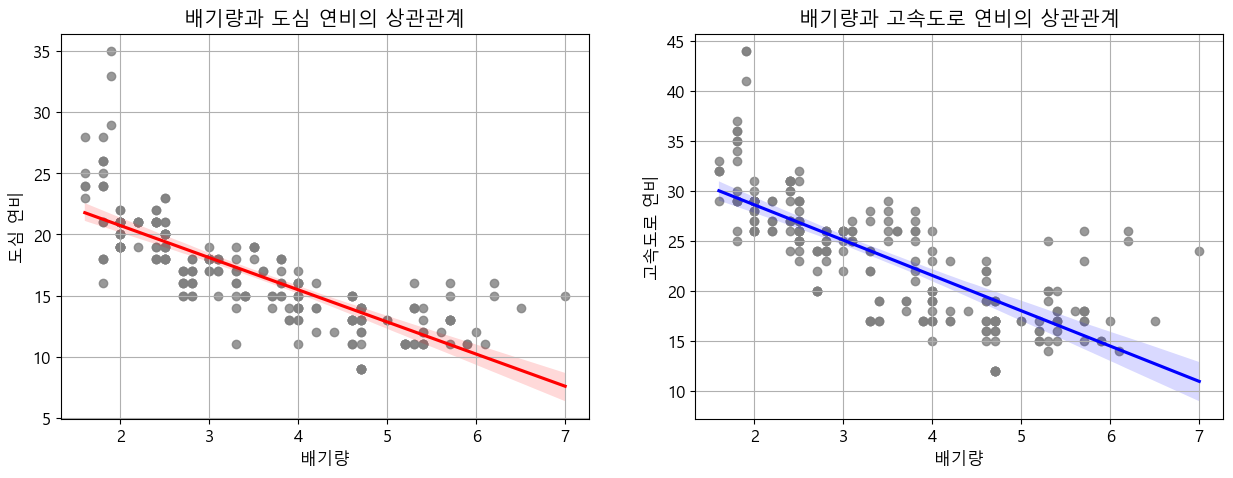

In [40]:
fig, ax = plt.subplots(1,2)

## ax1에 그래프 그리기
sb.regplot(data='df',x=df["displ"],y=df['cty'],label="배기량과 도심연비",
            line_kws={"color":"red"},scatter_kws={"color":"grey"},ax=ax[0])
ax[0].set_xlabel("배기량")
ax[0].set_ylabel("도심 연비")
ax[0].grid()
ax[0].set_title("배기량과 도심 연비의 상관관계")

## ax2에 그래프 그리기
sb.regplot(data='df',x=df["displ"],y=df['hwy'],label="배기량과 고속도로 연비",
            line_kws={"color":"blue"},scatter_kws={"color":"grey"},ax=ax[1])
ax[1].set_xlabel("배기량")
ax[1].set_ylabel("고속도로 연비")
ax[1].grid()
ax[1].set_title("배기량과 고속도로 연비의 상관관계")


# 문제7

데이터 전처리 요구사항
데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.

전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 표시할 수 있는 파생변수를 평가라는 이름으로 추가하시오.

평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 80점 이상일 경우 B, 70점 이상일 경우 C, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가하시오.

다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

- 자동차 구동방식별 평가에 대한 빈도

- 자동차 구동방식별 등급에 대한 빈도

- 자동차 연료 종류 평가에 대한 빈도

- 자동차 연료 종류 등급에 대한 빈도

- 자동차 분류별 평가에 대한 빈도

- 자동차 분류별 등급에 대한 빈도

- 평균연비는 고속도로연비와 도심연비에 대한 평균이다.

In [41]:
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [69]:
## 평균연비 : 고속도로와 도심연비의 평균
## 평균연비 구하기
df['mean'] = df.loc[:,"cty":"hwy"].mean(axis=1)

## 전체 연비의 평균
mean_value = df['mean'].mean()
mean_value
## pass/fail 칼럼 만들기

df['평가'] = np.where(df['mean']>mean_value,"PASS","FAIL")

## 평균 합


## 평균연비에 대한 백분률
## 전체합계 
total_sum = df['mean'].sum()

cond = [ ((df['mean']*100/df['mean'].mean()) >= 90),
        ((df['mean']*100/df['mean'].mean()) >= 80),
        ((df['mean']*100/df['mean'].mean()) >= 70)
]

value=["A","B","C"]
df['등급'] = np.select(cond,value,default="D")
df['mean'].mean()

20.14957264957265

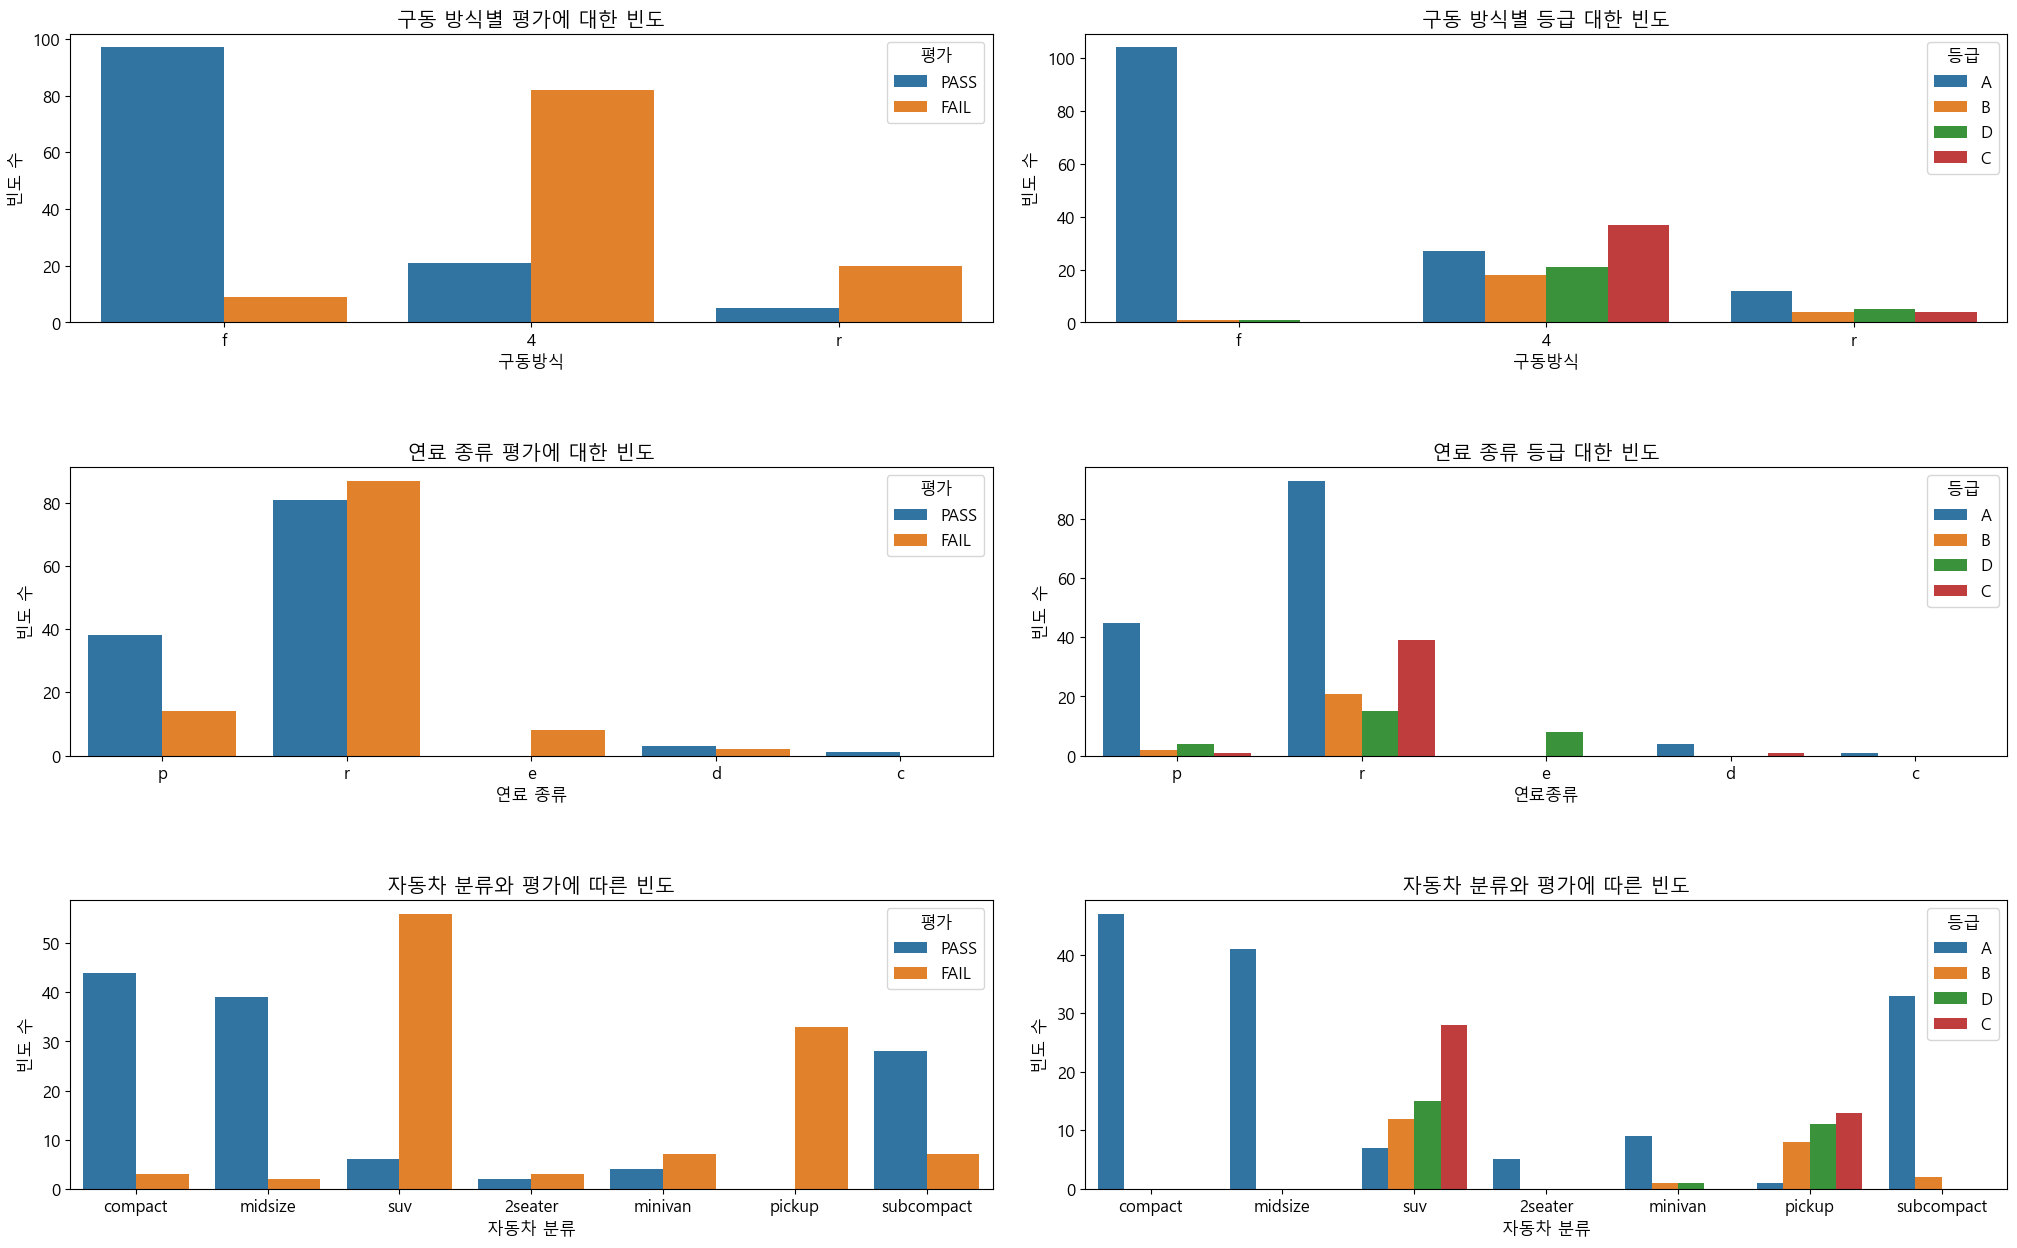

<function matplotlib.pyplot.close(fig=None)>

In [70]:
## 그래프 그리기 
# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (25, 15)

fig, ax = plt.subplots(3,2)

plt.subplots_adjust(wspace=0.1, hspace=0.5)


## 구동방식에 따른 그래프 그리기
sb.countplot(data=df, x=df['drv'],hue = df['평가'],ax=ax[0][0])
ax[0][0].set_title("구동 방식별 평가에 대한 빈도")
ax[0][0].set_ylabel("빈도 수")
ax[0][0].set_xlabel("구동방식")

sb.countplot(data=df, x=df['drv'],hue = df['등급'],ax=ax[0][1])
ax[0][1].set_title("구동 방식별 등급 대한 빈도")
ax[0][1].set_ylabel("빈도 수")
ax[0][1].set_xlabel("구동방식")

# 연료종류에 따른 그래프
sb.countplot(data=df, x=df['fl'],hue = df['평가'],ax=ax[1][0])
ax[1][0].set_title("연료 종류 평가에 대한 빈도")
ax[1][0].set_ylabel("빈도 수")
ax[1][0].set_xlabel("연료 종류")

sb.countplot(data=df, x=df['fl'],hue = df['등급'],ax=ax[1][1])
ax[1][1].set_title("연료 종류 등급 대한 빈도")
ax[1][1].set_ylabel("빈도 수")
ax[1][1].set_xlabel("연료종류")


# 자동차 분류에 따른 그래프
sb.countplot(data=df, x=df['class'],hue = df['평가'],ax=ax[2][0])
ax[2][0].set_title("자동차 분류와 평가에 따른 빈도")
ax[2][0].set_ylabel("빈도 수")
ax[2][0].set_xlabel("자동차 분류")

sb.countplot(data=df, x=df['class'],hue = df['등급'],ax=ax[2][1])
ax[2][1].set_title("자동차 분류와 평가에 따른 빈도")
ax[2][1].set_ylabel("빈도 수")
ax[2][1].set_xlabel("자동차 분류")

plt.show()

plt.close